In [78]:
import pandas as pd
import numpy as np

dataset= pd.read_csv('IRIS.csv')

# Data Preprocessing & Cleaning 

In [79]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [81]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [82]:
dataset.shape

(150, 5)

In [83]:
dataset.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [84]:
print("Columns in data_set:")
print(dataset.columns, "\n")

Columns in data_set:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object') 



In [85]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [86]:
dataset.drop_duplicates(inplace= True)
dataset.duplicated().sum()

0

<Axes: >

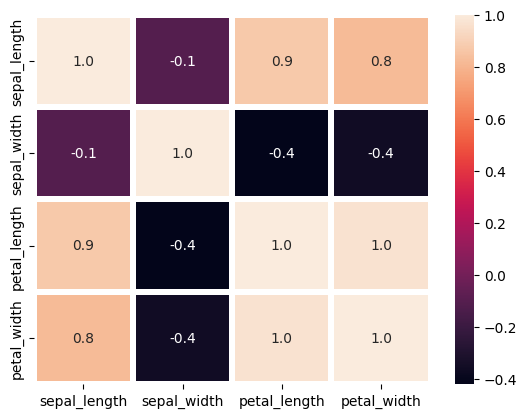

In [87]:
import seaborn as sns

num_cols = dataset.select_dtypes(include='number').columns

corr_matrix = dataset[num_cols].corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True,fmt='.1f',linewidths=4)

In [88]:
from scipy.stats import zscore
import numpy as np

numeric_columns = dataset.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_columns))
cleaned_dataset = dataset.copy()

#iterate over each numeric column
for col in numeric_columns.columns:
    median = numeric_columns[col].median()
    outliers = z_scores[col] > 3
    cleaned_dataset.loc[outliers, col] = median

dataset = cleaned_dataset

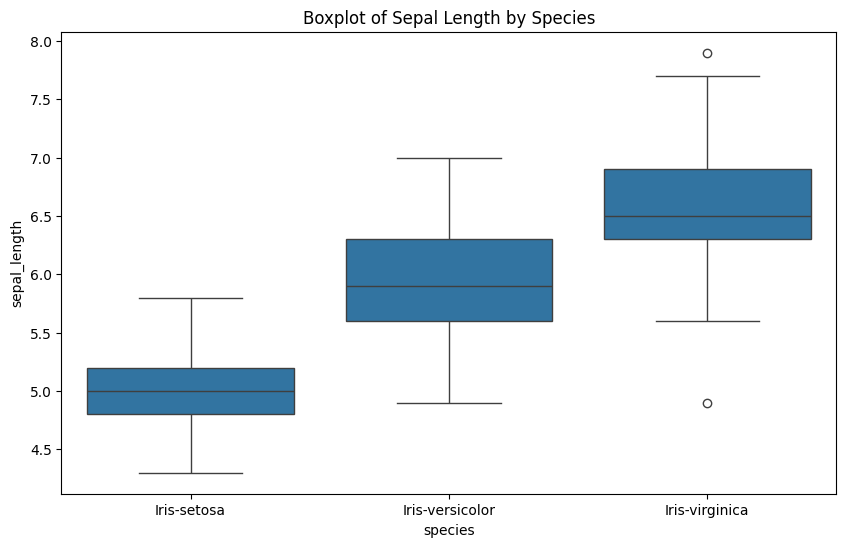

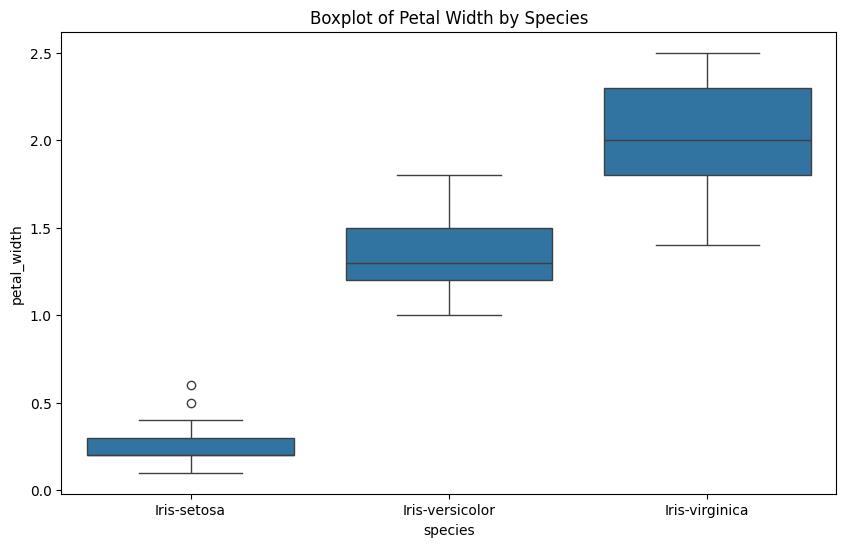

In [89]:
# Boxplot to visualize the distribution of sepal length by species
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_length', data=dataset)
plt.title('Boxplot of Sepal Length by Species')
plt.show()

# Boxplot to visualize the distribution of petal width by species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_width', data=dataset)
plt.title('Boxplot of Petal Width by Species')
plt.show()

In [90]:
dataset['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

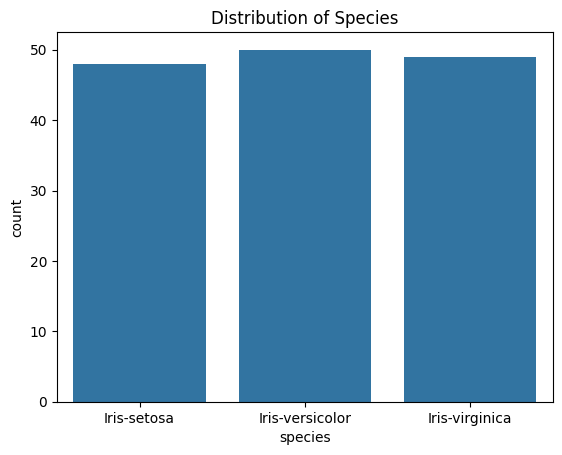

In [91]:
#  Species distribution (count plot)

sns.countplot(x='species', data=dataset)
plt.title('Distribution of Species')
plt.show()

In [92]:
# Replacing infinite values with (NaN)  
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)  

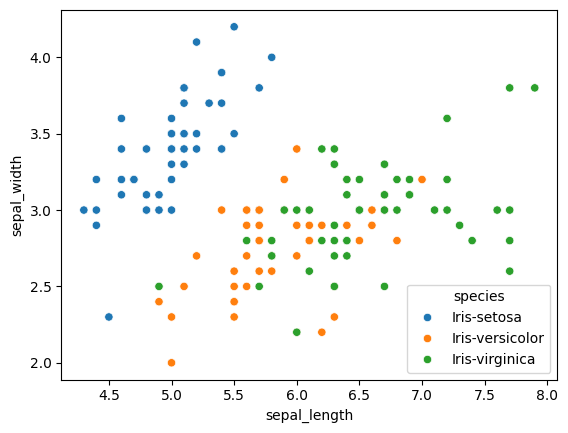

In [93]:
sns.scatterplot(data=dataset, x="sepal_length", y="sepal_width",hue="species")
plt.show()

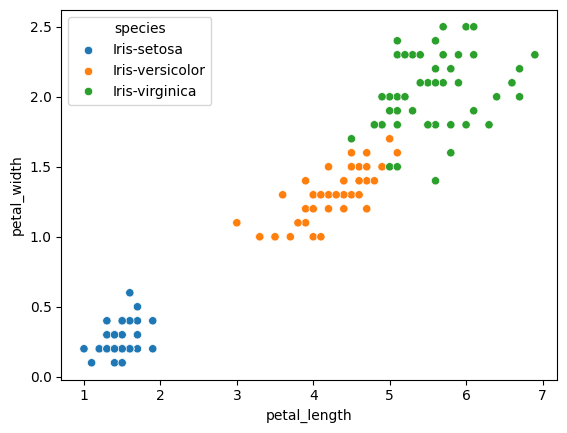

In [94]:
sns.scatterplot(data=dataset, x="petal_length", y="petal_width",hue="species")
plt.show()

In [95]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()  
dataset['species'] = label_encoder.fit_transform(dataset['species']) 

In [96]:
dataset['species'].value_counts()

species
1    50
2    49
0    48
Name: count, dtype: int64

# Supervised Machine Learning (Classification)

In [97]:
# Features and the Target variable

X = dataset.drop('species', axis=1)  
y = dataset['species']       

In [98]:
from sklearn.model_selection import train_test_split

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Normalization 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

# 1. Histogram-based Gradient Boosting Classification Tree.
hg = HistGradientBoostingClassifier(loss= 'log_loss')
hg.fit(X_train, y_train)
y_pred_hg = hg.predict(X_test)

print("--- HistGradientBoostingClassifier Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_hg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_hg))
print("F1 Score:", f1_score(y_test, y_pred_hg, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_hg))
cm = confusion_matrix(y_test, y_pred_hg)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity:", specificity)
print("\n")    

--- HistGradientBoostingClassifier Forest ---
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
F1 Score: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Specificity: 1.0




In [101]:
# 2. Support Vector Classifier (SVC)
svc = SVC(kernel='poly', degree=3)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("--- SVC ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("F1 Score:", f1_score(y_test, y_pred_svc, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
cm1 = confusion_matrix(y_test, y_pred_svc)
specificity1 = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
print("Specificity:", specificity1)
print("\n")

--- SVC ---
Accuracy: 0.8666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  3  6]]
F1 Score: 0.8643939393939394
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.75      0.90      0.82        10
           2       0.86      0.67      0.75         9

    accuracy                           0.87        30
   macro avg       0.87      0.86      0.86        30
weighted avg       0.87      0.87      0.86        30

Specificity: 1.0




In [102]:
# 3. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("--- KNN ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
cm2 = confusion_matrix(y_test, y_pred_knn)
specificity2 = cm2[0, 0] / (cm2[0, 0] + cm2[0, 1])
print("Specificity:", specificity2)
print("\n")

--- KNN ---
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
F1 Score: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Specificity: 1.0




In [103]:
# 4. Multi-layer Perceptron classifier (MLP)
mlp = MLPClassifier(activation='relu')
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

print("--- Multi-layer Perceptron ---")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("F1 Score:", f1_score(y_test, y_pred_mlp, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))
cm3 = confusion_matrix(y_test, y_pred_mlp)
specificity3 = cm3[0, 0] / (cm3[0, 0] + cm3[0, 1])
print("Specificity:", specificity3)
print("\n")

--- Multi-layer Perceptron ---
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
F1 Score: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Specificity: 1.0




c:\Users\PC\Desktop\Data Science KAIS\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [104]:
# 5. Logistic Regression
lr = LogisticRegression(C=10)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
cm4 = confusion_matrix(y_test, y_pred_lr)
specificity4 = cm4[0, 0] / (cm4[0, 0] + cm4[0, 1])
print("Specificity:", specificity4)
print("\n")

--- Logistic Regression ---
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
F1 Score: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Specificity: 1.0




In [105]:
# Evaluation Table
models = ['HistGradientBoostingClassifier Forest', 'Support Vector Classifier(SVC)', 'K-Nearest Neighbors(KNN)', 'Multi-layer Perceptron(MLP)']
Accuracy_scores = [
    accuracy_score(y_test, y_pred_hg),
    accuracy_score(y_test, y_pred_svc),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_mlp)
]

f1_scores = [
    f1_score(y_test, y_pred_hg, average='weighted'),
    f1_score(y_test, y_pred_svc, average='weighted'),
    f1_score(y_test, y_pred_knn, average='weighted'),
    f1_score(y_test, y_pred_mlp, average='weighted')
]


results = pd.DataFrame({
    'Model': models,
    'Accuracy_score': Accuracy_scores,
    'f1_score': f1_scores,
    
})

print("Evaluation Table:")
results.set_index('Model')


Evaluation Table:


,Accuracy_score,f1_score
Model,,
HistGradientBoostingClassifier Forest,0.933333,0.933333
Support Vector Classifier(SVC),0.866667,0.864394
K-Nearest Neighbors(KNN),0.933333,0.933333
Multi-layer Perceptron(MLP),0.933333,0.933333
